

# New York City 5 Boroughs Crimes Data

Team:  Brian Gaither, Aurian Ghaemmaghami, Drew Larsen and Sabrina Purvis  
    

## Business Understanding:


The selected dataset documents all reported crimes in the 5 boroughs of New York City up to but excluding murder.  We hope to gather insights related to location, probability and crime type classification.  With these findings, we believe we could make recommendations on police training, shift allocations, and jail/prison capacity.  

This data has been gathered from https://www.kaggle.com/adamschroeder/crimes-new-york-city.
  
Dataset has 1,048,575  observations with 24 columns  
  
|Variable Label|Variable Type|Data Description|
| :-|:-|:-|
|CMPLNT_NUM|Continuous|Randomly generated persistent ID for each complaint |
|CMPLNT_FR_DT|Datestamp|	Exact date of occurrence for the reported event (or starting date of occurrence, if CMPLNT_TO_DT exists)|
|CMPLNT_FR_TM|Timestamp|	Exact time of occurrence for the reported event (or starting time of occurrence, if CMPLNT_TO_TM exists)|
|CMPLNT_TO_DT|Datestamp|	Ending date of occurrence for the reported event, if exact time of occurrence is unknown|
|CMPLNT_TO_TM|Timestamp|	Ending time of occurrence for the reported event, if exact time of occurrence is unknown|
|RPT_DT|Datestamp|	Date event was reported to police |
|KY_CD|Categorical|	Three digit offense classification code|
|OFNS_DESC	|Categorical (string)|Description of offense corresponding with key code|
|PD_CD	|Categorical|Three digit internal classification code (more granular than Key Code)|
|PD_DESC|Categorical (string)|	Description of internal classification corresponding with PD code (more granular than Offense Description)|
|CRM_ATPT_CPTD_CD|Categorical|	Indicator of whether crime was successfully completed or attempted, but failed or was interrupted prematurely|
|LAW_CAT_CD|Categorical|	Level of offense: felony, misdemeanor, violation |
|JURIS_DESC|Categorical|	Jurisdiction responsible for incident. Either internal, like Police, Transit, and Housing; or external, like Correction, Port Authority, etc.|
|BORO_NM	|Categorical|The name of the borough in which the incident occurred|
|ADDR_PCT_CD	|Categorical|The precinct in which the incident occurred|
|LOC_OF_OCCUR_DESC|Categorical|	Specific location of occurrence in or around the premises; inside, opposite of, front of, rear of|
|PREM_TYP_DESC|Categorical|	Specific description of premises; grocery store, residence, street, etc.|
|PARKS_NM	|Categorical|Name of NYC park, playground or greenspace of occurrence, if applicable (state parks are not included)|
|HADEVELOPT|Categorical|	Name of NYCHA housing development of occurrence, if applicable|
|X_COORD_CD|Continuous|	X-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)|
|Y_COORD_CD|Continuous|	Y-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)|
|Latitude|Continuous|	Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326) |
|Longitude|Continuous|	Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)|

This dataset has a second file provided that provides each of the 5 borough population metrics by decade from 1950 with projections through 2040.




Describe how you would define and measure the outcomes  
For instance TPR/FPR  
Why is the data important  
How would you measure the effectiveness of a good prediction algorithm  
Like RMSE, Accuracy  
  
Data Meaning Type:  
Describe the meaning and type of data for each attributes  
Scale, values, etc  
What is the one sentence that describes what the attribute is?  
It's important to know when the data attribute would be available  
It isn't helpful to bring data into a model that won't be available at the time we run the mode  

### EDA Plan:

1.  Clean up variable types
2.  Add variables for day of week, month and year based on date variables  
3.  Add times of day or shift allocations to time variable


  
Additional Considerations:
 - weather data to see how weather affects crime
 - Unemployment statistics

#### Weather Data

Weather data was captured from https://www.ncdc.noaa.gov/.  I pulled all weather data from 2010 to 2020 and set the location as Central Park Station.  

Variables captured are described as follows:

|Variable code|Description|Unit of Measure|
|:-|:-|:-|
|PRCP|Precipitation|Inches|
|SNOW|Snowfall|Inches|
|TMAX|Maximum temperature|Fahrenheit|
|TMIN|Minimum temperature|Fahrenheit|

### Follow Up Items:

1. I need to redirect the csv file to the github repo directly once I post it there.  I should be able to copy the logic from this (df = pd.read_csv('https://raw.githubusercontent.com/eclarson/DataMiningNotebooks/master/data/titanic.csv') # read in the csv file) read in from Dr. Larsen to do so.  I need first to make available the full dataset on the github for it to work.  I don't know if by posting the file I will interfere with the team, so I need to ask/research that.  For now, I'll work locally off the datafile and push only the notebook


### Notes for the team

1.  Do we want to consider only assessing top 20 crimes?
2.  Do we want to consider dropping latency reporting of crimes?


In [1]:
import pandas as pd
import altair as alt
import pandas_profiling
import numpy as np
from datetime import datetime 
from datetime import date
import calendar
import time
import math
import seaborn as sns

In [2]:
df_Crime = pd.read_csv('NYPD_Complaint_Data_Historic.csv') # read in the csv %%file

C:\Users\sabrina.purvis\Anaconda3\envs\ML7331\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Brian's super fancy functions to scrub the time data

In [3]:
def combineDateTime(Date,Time):
    
    try:
        month,day,year = str(Date).split('/')
        if year == '1015':
            year = '2015'
            Date = month+'/'+day+'/'+year
        
        datetime(int(year),int(month),int(day)) #this checks if it's a proper date format
        
        myDateTime = str(Date)+' '+str(Time)
        datetime.strptime(myDateTime, "%m/%d/%Y %H:%M:%S")
    except:
        myDateTime = None
        
    return myDateTime

def getHours(fromDateTime, toDateTime):
    dateDiff = None
    
    try:
        if (fromDateTime !=None) & (toDateTime != None):
            start = datetime.strptime(fromDateTime, "%m/%d/%Y %H:%M:%S")
            end = datetime.strptime(toDateTime, "%m/%d/%Y %H:%M:%S")
            dateDiff = end - start
            dateDiff = dateDiff.seconds
            dateDiff = math.ceil(dateDiff/60/60)
    except:
        dateDiff = None
    
    return dateDiff

def getDaysBtwnDates(fromDate, toDate):
    dateDiff = None
    
    try: 
        month1,day1,year1 = str(fromDate).split('/')
        month2,day2,year2 = str(toDate).split('/')
        start = date(int(year1),int(month1),int(day1))
        end = date(int(year2),int(month2),int(day2))
        dateDiff = end - start
        dateDiff = dateDiff.days
            
    except:
        dateDiff = None
    
    return dateDiff

def getSeason(Date):
    season = None
    try:
        #strip month out
        month,day,year = str(Date).split('/')
        #define seasons by month
        Winter = [12,1,2]
        Spring = [3,4,5]
        Summer = [6,7,8]
        Fall = [9,10,11]
        
        if Winter.count(int(month)) == 1:
            season = 'Winter'
        elif Spring.count(int(month)) == 1:
            season = 'Spring'
        elif Summer.count(int(month)) == 1:
            season = 'Summer'
        elif Fall.count(int(month)) == 1:
            season = 'Fall'
    except:
        season = None
    
    return season

def getDayTime(Time):
    daytime = None
    
    try:
        hour,minute,second = str(Time).split(':')
        val = int(str(hour)+str(minute)) #convert into a number
        
        #evaluate the resulting value to determine day time
        if (val>200)&(val<=600):
            daytime = 'Early Morning'
        elif (val>600)&(val<=1000):
            daytime = 'Morning'
        elif (val>1000)&(val<=1400):
            daytime = 'Day'
        elif (val>1400)&(val<=1800):
            daytime = 'Evening'
        elif (val>1800)&(val<=2200):
            daytime = 'Night'
        elif (val>2200)&(val<=2400):
            daytime = 'Late Night'
        elif (val>=100)&(val<=200):
            daytime = 'Late Night'
    except:
        daytime = None
    
    return daytime

def getMonth(Date):
    val = None
    try:
        #strip month out
        month,day,year = str(Date).split('/')
        #mo = month
        dto = datetime.strptime(month,"%m")
        val = dto.strftime("%B") #date(1900, mo, 1).strftime('%B')

    except:
        val = None
    
    return val

def getDay(Date):
    val = None
    try:
        #strip day out
        month,day,year = str(Date).split('/')

        val = int(day)

    except:
        val = None
    
    return val

def getDayName(Date):
    val = None
    try:
        if (Date != None):

            dto = datetime.strptime(str(Date), "%Y-%m-%d %H:%M:%S")
            val = dto.strftime("%A")
        
    except:
        val = None
    
    return val

def getYear(Date):
    val = None
    try:
        #strip year out
        month,day,year = str(Date).split('/')
        if year == '1015':
            year = '2015'
   
        val = int(year)

    except:
        val = None
    
    return val

def cleanDate(Date):
    newDate = None
    try:
        month,day,year = str(Date).split('/')
        if year == '1015':
            year = '2015'
            newDate = str(month)+'/'+str(day)+'/'+str(year)
        else:
            newDate = str(month)+'/'+str(day)+'/'+str(year)

    except:
        newDate = None
        
    return newDate

#### Converting date fields

In [4]:
df_Crime['CMPLNT_FR_DT'] = df_Crime.apply(lambda x: cleanDate(x['CMPLNT_FR_DT']),axis=1)

In [5]:
df_Crime['CMPLNT_TO_DT'] = df_Crime.apply(lambda x: cleanDate(x['CMPLNT_TO_DT']),axis=1)

In [6]:
df_Crime['Start_Dt_Tm'] = df_Crime.apply(lambda x: combineDateTime(x['CMPLNT_FR_DT'],x['CMPLNT_FR_TM']),axis=1)

In [7]:
df_Crime['End_Dt_Tm'] = df_Crime.apply(lambda x: combineDateTime(x['CMPLNT_TO_DT'],x['CMPLNT_TO_TM']),axis=1)

In [8]:
df_Crime['Day_Name'] = df_Crime.apply(lambda x: getDayName(x['Start_Dt_Tm']),axis=1)

In [9]:
df_Crime['Duration'] = df_Crime.apply(lambda x: getHours(x['Start_Dt_Tm'],x['End_Dt_Tm']),axis=1)

In [10]:
df_Crime['Duration_to_PD'] = df_Crime.apply(lambda x: getDaysBtwnDates(x['CMPLNT_FR_DT'],x['RPT_DT']),axis=1)

In [11]:
df_Crime['Month'] = df_Crime.apply(lambda x: getMonth(x['CMPLNT_FR_DT']),axis=1)

In [12]:
df_Crime['Day'] = df_Crime.apply(lambda x: getDay(x['CMPLNT_FR_DT']),axis=1)

In [13]:
df_Crime['Year'] = df_Crime.apply(lambda x: getYear(x['CMPLNT_FR_DT']),axis=1)

In [14]:
#Cut duration into bins (short, medium and long)
df_Crime['Duration_lbl'] = pd.cut(x=df_Crime['Duration'], bins=[1,8,16,26], labels=['Short', 'Medium', 'Long'], right=False)

In [15]:
#cut start time into seasonal bins
df_Crime['Season'] = df_Crime.apply(lambda x: getSeason(x['CMPLNT_FR_DT']),axis=1)

In [16]:
#cut start time into daytime bins
df_Crime['Daytime'] = df_Crime.apply(lambda x: getDayTime(x['CMPLNT_FR_TM']),axis=1)

In [17]:
df_Crime['Start_Dt_Tm'] = pd.to_datetime(df_Crime['Start_Dt_Tm'])

In [18]:
df_Crime['End_Dt_Tm'] = pd.to_datetime(df_Crime['End_Dt_Tm'])

In [ ]:
df_Crime.dtypes

In [ ]:
df_Crime.head()

In [ ]:
print (df_Crime.info())

### Creating a subset dataframe  
  
Dropping columns 'CMPLNT_FR_TM', 'CMPLNT_TO_DT','CMPLNT_TO_TM', 'PARKS_NM', 'End_Dt_Tm', 'Duration', 'HADEVELOPT', 'Day_Name' and then NaNs.  I need to go back and add Day_Name back in.  The binning function is failing for me somehow.

In [19]:
#Preserving the dataframe
df_Crime_original = df_Crime

In [20]:
df_Crime = df_Crime.drop(columns=['CMPLNT_FR_TM','CMPLNT_TO_DT','CMPLNT_TO_TM',
                                  'PARKS_NM','End_Dt_Tm','Duration','HADEVELOPT','Day_Name'])

In [21]:
df_Crime.isnull().values.any()

True

In [22]:
df_Crime = df_Crime.dropna()

In [23]:
df_Crime.isnull().values.any()

False

In [24]:
#trying to group by boroughs
df_Crime['BORO_NM'].value_counts()

BROOKLYN         187955
MANHATTAN        138771
QUEENS           121497
BRONX            110178
STATEN ISLAND     29241
Name: BORO_NM, dtype: int64

In [25]:
df_Crime['Season'].value_counts()

Fall      161813
Summer    145827
Winter    143560
Spring    136442
Name: Season, dtype: int64

In [26]:
df_Crime['Daytime'].value_counts()

Evening          140384
Night            137288
Day              114857
Morning           76392
Late Night        70449
Early Morning     48272
Name: Daytime, dtype: int64

In [56]:
df_Crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587642 entries, 4 to 1048573
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CMPLNT_NUM         587642 non-null  int64         
 1   CMPLNT_FR_DT       587642 non-null  object        
 2   RPT_DT             587642 non-null  object        
 3   KY_CD              587642 non-null  int64         
 4   OFNS_DESC          587642 non-null  object        
 5   PD_CD              587642 non-null  float64       
 6   PD_DESC            587642 non-null  object        
 7   CRM_ATPT_CPTD_CD   587642 non-null  object        
 8   LAW_CAT_CD         587642 non-null  object        
 9   JURIS_DESC         587642 non-null  object        
 10  BORO_NM            587642 non-null  object        
 11  ADDR_PCT_CD        587642 non-null  float64       
 12  LOC_OF_OCCUR_DESC  587642 non-null  object        
 13  PREM_TYP_DESC      587642 non-null  object 

In [27]:
#Creating pivot tables (source: https://stackoverflow.com/questions/48768650/groupby-sum-and-count-on-multiple-columns-in-python)
df_pivot=pd.pivot_table(df_Crime, index=['BORO_NM', 'Season'], values=['CMPLNT_NUM'],aggfunc=len)
df_pivot

CMPLNT_NUM
BORO_NM       Season            
BRONX         Fall         31038
              Spring       25266
              Summer       27464
              Winter       26410
BROOKLYN      Fall         51791
              Spring       43555
              Summer       47006
              Winter       45603
MANHATTAN     Fall         37500
              Spring       32459
              Summer       34279
              Winter       34533
QUEENS        Fall         33398
              Spring       28175
              Summer       29779
              Winter       30145
STATEN ISLAND Fall          8086
              Spring        6987
              Summer        7299
              Winter        6869

### Running T Tests on borough data

None of the t-tests in aggregate found significance between boroughs in just case counts

In [ ]:
from scipy.stats import ttest_ind
ttest_ind(df_Crime.CMPLNT_NUM[df_Crime.BORO_NM == 'BRONX'],df_Crime.CMPLNT_NUM[df_Crime.BORO_NM == 'BROOKLYN'])

In [ ]:
ttest_ind(df_Crime.CMPLNT_NUM[df_Crime.BORO_NM == 'BRONX'],df_Crime.CMPLNT_NUM[df_Crime.BORO_NM == 'QUEENS'])

In [ ]:
ttest_ind(df_Crime.CMPLNT_NUM[df_Crime.BORO_NM == 'BRONX'],df_Crime.CMPLNT_NUM[df_Crime.BORO_NM == 'STATEN ISLAND'])

In [ ]:
ttest_ind(df_Crime.CMPLNT_NUM[df_Crime.BORO_NM == 'BRONX'],df_Crime.CMPLNT_NUM[df_Crime.BORO_NM == 'MANHATTAN'])

In [ ]:
ttest_ind(df_Crime.CMPLNT_NUM[df_Crime.BORO_NM == 'QUEENS'],df_Crime.CMPLNT_NUM[df_Crime.BORO_NM == 'STATEN ISLAND'])

In [ ]:
ttest_ind(df_Crime.CMPLNT_NUM[df_Crime.BORO_NM == 'QUEENS'],df_Crime.CMPLNT_NUM[df_Crime.BORO_NM == 'BROOKLYN'])

In [ ]:
ttest_ind(df_Crime.CMPLNT_NUM[df_Crime.BORO_NM == 'QUEENS'],df_Crime.CMPLNT_NUM[df_Crime.BORO_NM == 'MANHATTAN'])

In [ ]:
ttest_ind(df_Crime.CMPLNT_NUM[df_Crime.BORO_NM == 'MANHATTAN'],df_Crime.CMPLNT_NUM[df_Crime.BORO_NM == 'STATEN ISLAND'])

In [ ]:
ttest_ind(df_Crime.CMPLNT_NUM[df_Crime.BORO_NM == 'MANHATTAN'],df_Crime.CMPLNT_NUM[df_Crime.BORO_NM == 'BROOKLYN'])

In [ ]:
ttest_ind(df_Crime.CMPLNT_NUM[df_Crime.BORO_NM == 'BROOKLYN'],df_Crime.CMPLNT_NUM[df_Crime.BORO_NM == 'STATEN ISLAND'])

### Creating a dataframe of just the felony data to see if I can find significance there

Test shows significance with Bronx v Staten Island for felonies

In [ ]:
df_Crime_felony = df_Crime[(df_Crime.LAW_CAT_CD == "FELONY")]

In [ ]:
ttest_ind(df_Crime_felony.CMPLNT_NUM[df_Crime_felony.BORO_NM == 'BRONX'],
          df_Crime_felony.CMPLNT_NUM[df_Crime_felony.BORO_NM == 'BROOKLYN'])

In [ ]:
ttest_ind(df_Crime_felony.CMPLNT_NUM[df_Crime_felony.BORO_NM == 'BRONX'],
          df_Crime_felony.CMPLNT_NUM[df_Crime_felony.BORO_NM == 'MANHATTAN'])

In [ ]:
ttest_ind(df_Crime_felony.CMPLNT_NUM[df_Crime_felony.BORO_NM == 'BRONX'],
          df_Crime_felony.CMPLNT_NUM[df_Crime_felony.BORO_NM == 'STATEN ISLAND'])

In [ ]:
ttest_ind(df_Crime_felony.CMPLNT_NUM[df_Crime_felony.BORO_NM == 'BRONX'],
          df_Crime_felony.CMPLNT_NUM[df_Crime_felony.BORO_NM == 'QUEENS'])

In [ ]:
ttest_ind(df_Crime_felony.CMPLNT_NUM[df_Crime_felony.BORO_NM == 'BROOKLYN'],
          df_Crime_felony.CMPLNT_NUM[df_Crime_felony.BORO_NM == 'MANHATTAN'])

In [ ]:
ttest_ind(df_Crime_felony.CMPLNT_NUM[df_Crime_felony.BORO_NM == 'BROOKLYN'],
          df_Crime_felony.CMPLNT_NUM[df_Crime_felony.BORO_NM == 'QUEENS'])

In [ ]:
ttest_ind(df_Crime_felony.CMPLNT_NUM[df_Crime_felony.BORO_NM == 'BROOKLYN'],
          df_Crime_felony.CMPLNT_NUM[df_Crime_felony.BORO_NM == 'STATEN ISLAND'])

In [ ]:
ttest_ind(df_Crime_felony.CMPLNT_NUM[df_Crime_felony.BORO_NM == 'MANHATTAN'],
          df_Crime_felony.CMPLNT_NUM[df_Crime_felony.BORO_NM == 'QUEENS'])

In [ ]:
ttest_ind(df_Crime_felony.CMPLNT_NUM[df_Crime_felony.BORO_NM == 'MANHATTAN'],
          df_Crime_felony.CMPLNT_NUM[df_Crime_felony.BORO_NM == 'STATEN ISLAND'])

In [ ]:
ttest_ind(df_Crime_felony.CMPLNT_NUM[df_Crime_felony.BORO_NM == 'STATEN ISLAND'],
          df_Crime_felony.CMPLNT_NUM[df_Crime_felony.BORO_NM == 'QUEENS'])

In [ ]:
df_Crime_felony.describe()

In [54]:
#top 20 Crimes Data Subset
df = df_Crime[['OFNS_DESC','CMPLNT_NUM']].groupby(['OFNS_DESC']).size().nlargest(20).reset_index(name="top20")
print(df)

                         OFNS_DESC   top20
0                    PETIT LARCENY  119426
1                    HARRASSMENT 2   79813
2     ASSAULT 3 & RELATED OFFENSES   67170
3   CRIMINAL MISCHIEF & RELATED OF   58674
4                    GRAND LARCENY   57064
5                         BURGLARY   30145
6    OFF. AGNST PUB ORD SENSBLTY &   28470
7                   FELONY ASSAULT   26033
8                  DANGEROUS DRUGS   22994
9                          ROBBERY   17409
10         MISCELLANEOUS PENAL LAW   16878
11  OFFENSES AGAINST PUBLIC ADMINI   11054
12  GRAND LARCENY OF MOTOR VEHICLE   10596
13               DANGEROUS WEAPONS    7501
14               CRIMINAL TRESPASS    7191
15                     THEFT-FRAUD    4470
16                          FRAUDS    3106
17                         FORGERY    2990
18  INTOXICATED & IMPAIRED DRIVING    2249
19   POSSESSION OF STOLEN PROPERTY    2072


In [60]:
ggplot(df_Crime, aes(x='Month', y='CMPLNT_NUM')) + geom_bar() + facet_wrap(['OFNS_DESC'])

PlotnineError: 'stat_count() must not be used with a y aesthetic'

In [125]:
df_pivot=pd.pivot_table(df_Crime, index=['BORO_NM', 'LAW_CAT_CD'], values=['CMPLNT_NUM'],aggfunc=len)
df_pivot

CMPLNT_NUM
BORO_NM       LAW_CAT_CD             
BRONX         FELONY            30284
              MISDEMEANOR       65303
              VIOLATION         14591
BROOKLYN      FELONY            62543
              MISDEMEANOR       98088
              VIOLATION         27324
MANHATTAN     FELONY            44247
              MISDEMEANOR       79027
              VIOLATION         15497
QUEENS        FELONY            41356
              MISDEMEANOR       62646
              VIOLATION         17495
STATEN ISLAND FELONY             7013
              MISDEMEANOR       16468
              VIOLATION          5760

In [126]:
df_pivot=pd.pivot_table(df_Crime, index=[ 'LAW_CAT_CD','Daytime'], values=['CMPLNT_NUM'],aggfunc=len)
df_pivot

CMPLNT_NUM
LAW_CAT_CD  Daytime                  
FELONY      Day                 34885
            Early Morning       18482
            Evening             41119
            Late Night          23250
            Morning             27322
            Night               40385
MISDEMEANOR Day                 62025
            Early Morning       25404
            Evening             79589
            Late Night          39081
            Morning             37051
            Night               78382
VIOLATION   Day                 17947
            Early Morning        4386
            Evening             19676
            Late Night           8118
            Morning             12019
            Night               18521

In [128]:
#df_pivot=pd.pivot_table(df_Crime, index=[ 'LAW_CAT_CD','Day_Name'], values=['CMPLNT_NUM'],aggfunc=len)
#df_pivot

In [129]:
df_mo = df_Crime.groupby(['Month','BORO_NM']).agg(count_cmplnt=('CMPLNT_NUM','count')).reset_index()
df_mo

,Month,BORO_NM,count_cmplnt
0,April,BRONX,8237
1,April,BROOKLYN,14039
2,April,MANHATTAN,10400
3,April,QUEENS,9162
4,April,STATEN ISLAND,2246
5,August,BRONX,9816
6,August,BROOKLYN,16144
7,August,MANHATTAN,11556
8,August,QUEENS,10051
9,August,STATEN ISLAND,2526


In [130]:
df_pivot=pd.pivot_table(df_Crime, index=[ 'Latitude','Longitude'], values=['CMPLNT_NUM'],aggfunc=len)
df_pivot

,,CMPLNT_NUM
Latitude,Longitude,
40.498768,-74.240511,3
40.498905,-74.241537,1
40.499324,-74.239740,2
40.499759,-74.240371,1
40.499942,-74.239466,2
...,...,...
40.911632,-73.899987,4
40.911747,-73.906821,1
40.911982,-73.899068,7


Making a sample set for testing plotting config so I don't waste time with failures.  I am going to try and map the lat/longitude for a specific crime

In [ ]:
df_Crime_Sample = df_Crime.sample(n=10000)

In [ ]:
df_Crime_Sample.describe()

In [ ]:
#finding the boundary box - used to overlay points on a city map
#code source:  https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db

df_Crime.Longitude.min()

In [ ]:
df_Crime.Longitude.max()

In [ ]:
df_Crime.Latitude.max()

In [ ]:
df_Crime.Latitude.min()

In [63]:
from pandas.plotting import scatter_matrix

ax = scatter_matrix(df_Crime_Sample,figsize=(15, 10))

### Trying another plotting approach with plotnine/ggplot

In [32]:
#source:  https://monashdatafluency.github.io/python-workshop-base/modules/plotting_with_ggplot/
#source:  https://www.r-graph-gallery.com/2d-density-plot-with-ggplot2.html
#source:  http://zevross.com/blog/2014/08/04/beautiful-plotting-in-r-a-ggplot2-cheatsheet-3/

import numpy as np
import pandas as pd
from plotnine import *

%matplotlib inline

C:\Users\sabrina.purvis\Anaconda3\envs\ML7331\lib\site-packages\plotnine\layer.py:467: PlotnineWarning: geom_point : Removed 32417 rows containing missing values.


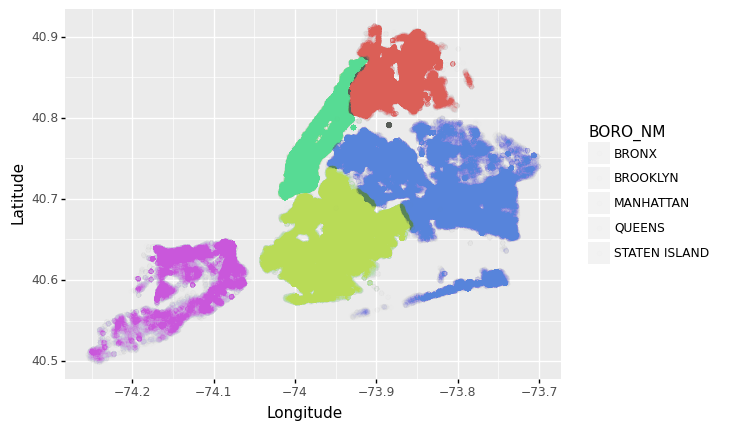

<ggplot: (125289575367)>

In [65]:
ggplot(df_Crime, aes(x='Longitude', y='Latitude',
    color = 'BORO_NM')) + geom_point(alpha=.005)

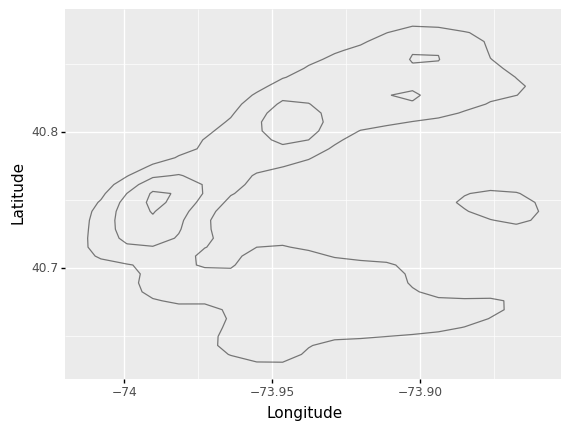

<ggplot: (113045412774)>

In [61]:
ggplot(df_Crime, aes(x='Longitude', y='Latitude')) + geom_density_2d(alpha=.5)

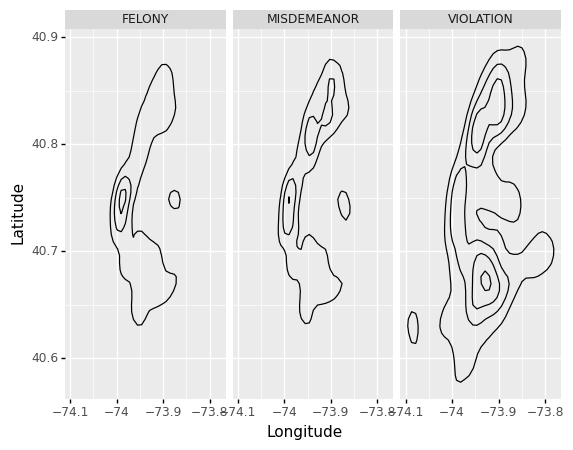

<ggplot: (113045412621)>

In [62]:
ggplot(df_Crime, aes(x='Longitude', y='Latitude')) + geom_density_2d() + facet_wrap(['LAW_CAT_CD'])

In [63]:
ggplot(df_Crime, aes(x='Longitude', y='Latitude')) + stat_density_2d_filled()

NameError: name 'stat_density_2d_filled' is not defined

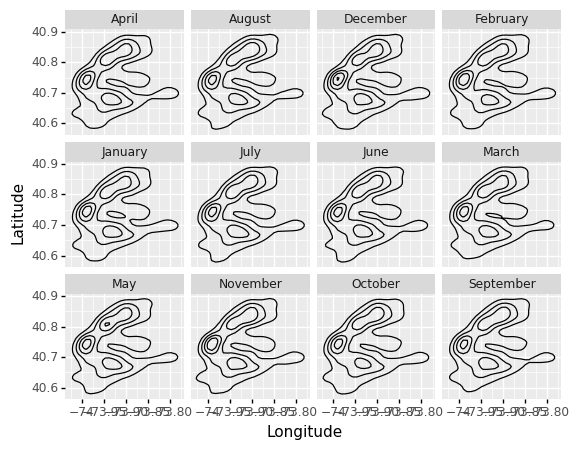

<ggplot: (113045412750)>

In [64]:
ggplot(df_Crime, aes(x='Longitude', y='Latitude')) + geom_density_2d() + facet_wrap(['Month'])

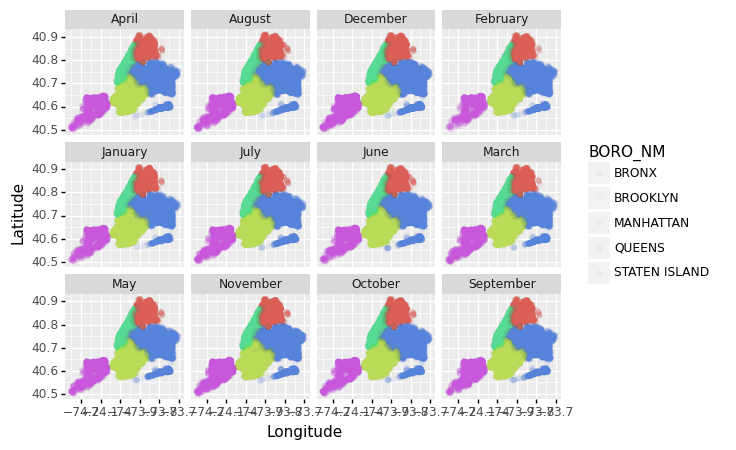

<ggplot: (113046119515)>

In [65]:
ggplot(df_Crime, aes(x='Longitude', y='Latitude', color = 'BORO_NM')) + geom_point(alpha=.05) + facet_wrap(['Month'])

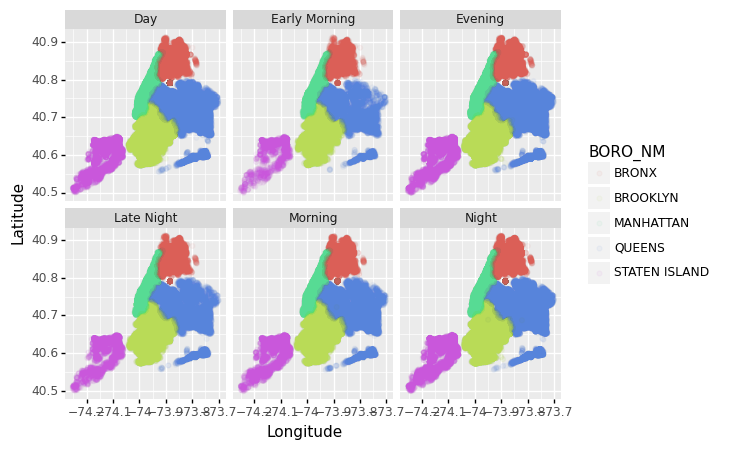

<ggplot: (113069033735)>

In [66]:
ggplot(df_Crime, aes(x='Longitude', y='Latitude', color = 'BORO_NM')) + geom_point(alpha=.05) + facet_wrap(['Daytime'])

In [ ]:
map = Basemap(llcrnrlon=df_Crime.Longitude.min(),llcrnrlat=df_Crime.Latitude.min(),urcrnrlon=df_Crime.Longitude.max(),urcrnrlat=df_Crime.Latitude.max(),
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)